# Using Data Augmantation
## "Horse or Human" dataset

## Download dataset and split images on train/validation folders
Original Dataset Folder:
https://www.tensorflow.org/datasets/catalog/horses_or_humans

Dataset is split in:
- test:	256 (300x300x3) images
- train:	1,027 (300x300x3) images



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-06-03 20:02:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.141.128, 2607:f8b0:4023:c06::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  85.9MB/s    in 1.7s    

2021-06-03 20:02:24 (85.9 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-06-03 20:02:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.141.128, 2607:f8b0:4023:c06::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response...

Train and Validation data will be loaded on separated folders (Please see the document "TFDS for Image Data", on `class 12/doc/`).

In [3]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')

zip_ref.close()

In [15]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

Now, let's see what the filenames look like in the horses and humans training directories:

In [17]:
train_horse_names = os.listdir('/tmp/horse-or-human/horses')
print(train_horse_names[:10])

['horse37-4.png', 'horse21-5.png', 'horse48-4.png', 'horse10-0.png', 'horse30-1.png', 'horse24-1.png', 'horse26-7.png', 'horse49-6.png', 'horse35-7.png', 'horse06-0.png']


In [18]:
train_human_names = os.listdir('/tmp/horse-or-human/humans')
print(train_human_names[:10])

['human05-27.png', 'human15-03.png', 'human02-22.png', 'human08-20.png', 'human10-11.png', 'human14-27.png', 'human10-01.png', 'human15-01.png', 'human11-08.png', 'human16-19.png']


In [19]:
validation_horse_hames = os.listdir('/tmp/validation-horse-or-human/horses')
print(validation_horse_hames[:10])

['horse3-055.png', 'horse4-202.png', 'horse6-218.png', 'horse5-100.png', 'horse3-217.png', 'horse2-314.png', 'horse2-218.png', 'horse5-181.png', 'horse5-478.png', 'horse5-076.png']


In [20]:
validation_human_names = os.listdir('/tmp/validation-horse-or-human/humans')
print(validation_human_names[:10])

['valhuman02-04.png', 'valhuman02-02.png', 'valhuman05-12.png', 'valhuman05-03.png', 'valhuman01-06.png', 'valhuman03-23.png', 'valhuman02-01.png', 'valhuman02-23.png', 'valhuman03-09.png', 'valhuman03-20.png']


Let's find out the total number of horse and human images in the directories:

In [14]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

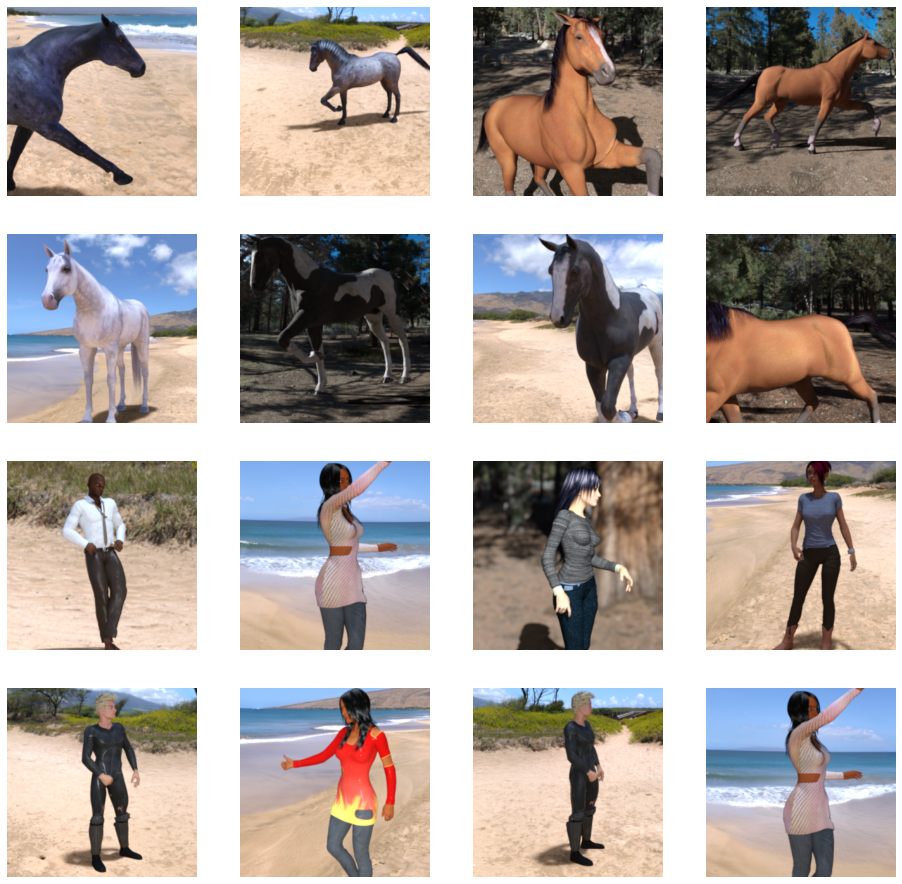

In [23]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Create and Train a TF Model

In [5]:
import tensorflow as tf

### Define your model and optimizer

In [6]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 100x100 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         2

In [9]:
from tensorflow.keras.optimizers import Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

### Organize the data into Generators
Note that we use several kinds of Data Augmentation. But the original image size is reduced to 100x100 pixels. What will speed up the training, but will make the final work worst. You can do better with a higher definition image, Play with it (but relax and use a cup of coffe when waiting...)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented wiht the full list of augmentation techniques below
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 100x100
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human',
        target_size=(100, 100),
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Train the model with the new augmented data
Since we now have more data due to the data augmentation this training process will take a bit longer than only using original images. However, the results are much better (You can try train the model w/o Data Augmentation to compare results).

In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data=validation_generator)

Epoch 1/100
8/8 [==============================] - 39s 915ms/step - loss: 0.6868 - accuracy: 0.5186 - val_loss: 0.6757 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 7s 918ms/step - loss: 0.6720 - accuracy: 0.5473 - val_loss: 0.6589 - val_accuracy: 0.5078
Epoch 3/100
8/8 [==============================] - 8s 978ms/step - loss: 0.6538 - accuracy: 0.7061 - val_loss: 0.6274 - val_accuracy: 0.6055
Epoch 4/100
8/8 [==============================] - 8s 984ms/step - loss: 0.6185 - accuracy: 0.6816 - val_loss: 0.5813 - val_accuracy: 0.6914
Epoch 5/100
8/8 [==============================] - 7s 908ms/step - loss: 0.5792 - accuracy: 0.7241 - val_loss: 0.6422 - val_accuracy: 0.5781
Epoch 6/100
8/8 [==============================] - 7s 921ms/step - loss: 0.5696 - accuracy: 0.7186 - val_loss: 0.6462 - val_accuracy: 0.5977
Epoch 7/100
8/8 [==============================] - 7s 913ms/step - loss: 0.5309 - accuracy: 0.7341 - val_loss: 0.4415 - val_accuracy: 0.8164
Epoch 8/100


In [12]:
def summarize_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper right')
  plt.show()

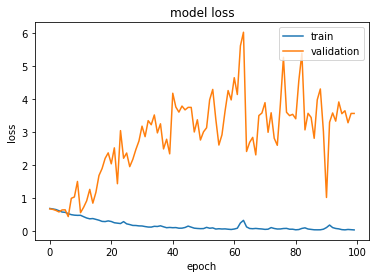

In [13]:
summarize_loss(history)

## Using the Model with real images (Inference)

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human. Was the model correct? Try a couple more images and see if you can confuse it!

In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(100, 100))
  x = image.img_to_array(img)
  x = x / 255.0
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse_1.jpg to horse_1.jpg
[[0.8708317]]
[0.8708317]
horse_1.jpg is a human


## Finally again lets visualize some of the layers for intuition

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


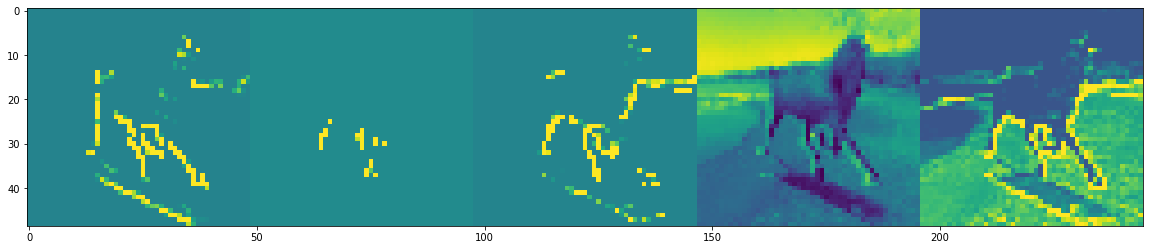

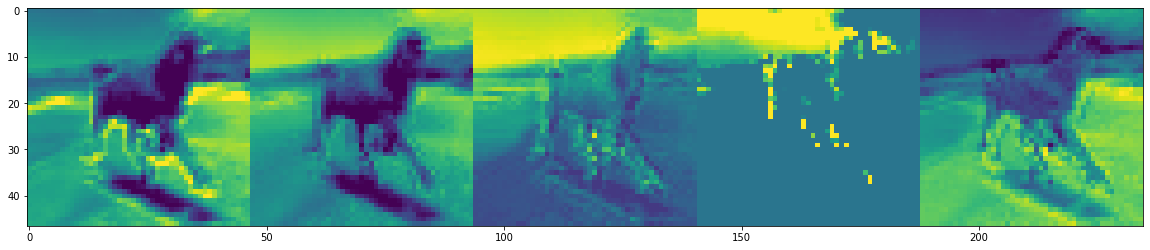

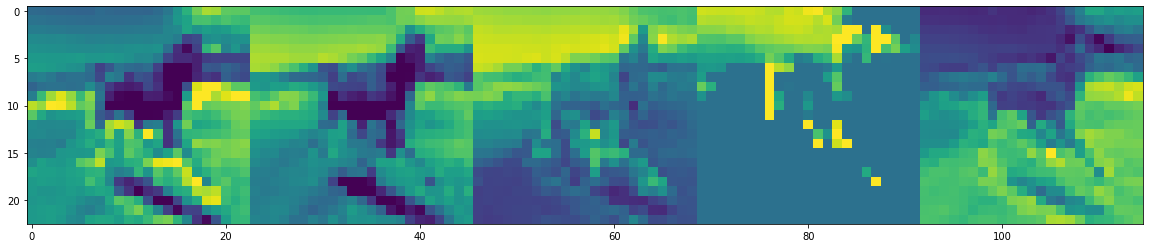

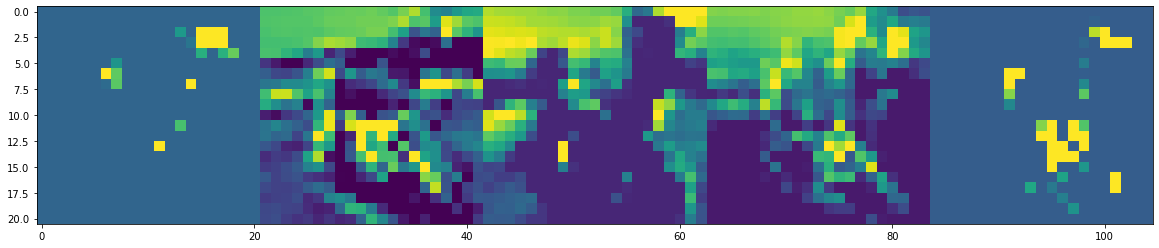

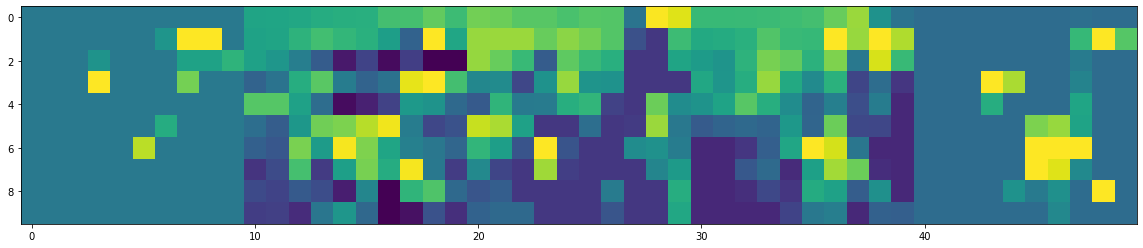

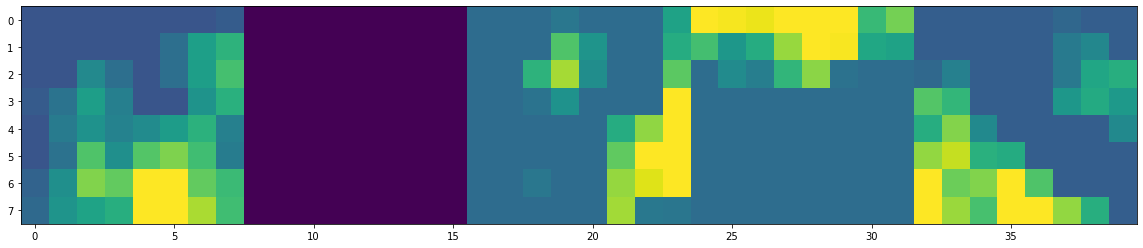

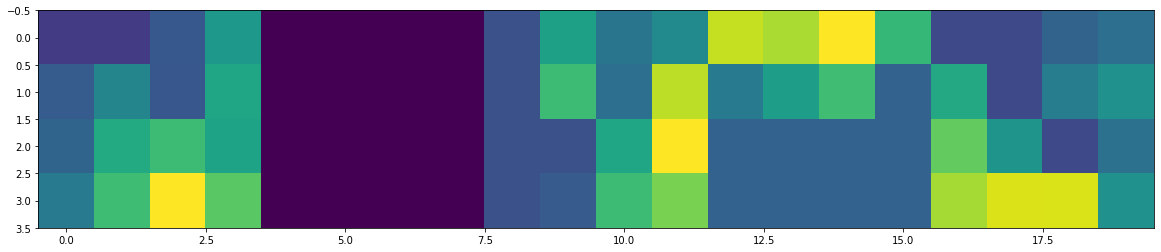

In [25]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
# uncomment the following line if you want to pick the Xth human file manually
# img_path = human_img_files[0]

img = load_img(img_path, target_size=(100, 100))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (100, 100, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 100, 100, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    n_features = min(n_features,5) # limit to 5 features for easier viewing
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    #plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)